## **Normalizing**


## Table of Contents:
* [Dataset](#Dataset)
* [No normalizing](#no-normalizing)
* [Normalizing](#normalizing)

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras import layers

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

<a name="Dataset"></a>
## Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
data = pd.read_csv("/content/drive/My Drive/auto-mpg.csv", na_values='?', usecols=["horsepower","acceleration","mpg"])
data = data.dropna()
data.head()

,mpg,horsepower,acceleration
0,18.0,130.0,12.0
1,15.0,165.0,11.5
2,18.0,150.0,11.0
3,16.0,150.0,12.0
4,17.0,140.0,10.5


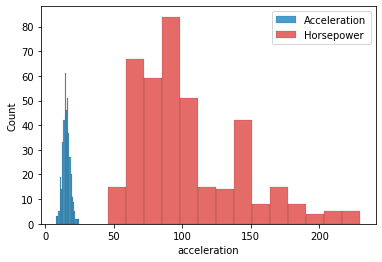

In [6]:
sns.histplot(data['acceleration'], color='#0B7CBB', linewidth=.1, label='Acceleration')
sns.histplot(data['horsepower'],   color='#DB3A34', linewidth=.1, label='Horsepower')
plt.legend()
plt.show()

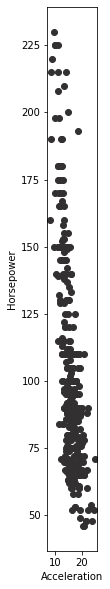

In [7]:
plt.figure(figsize=(10, 10))
plt.scatter(data['acceleration'],data['horsepower'], c = '#323031')
plt.xlabel('Acceleration')
plt.ylabel('Horsepower')
plt.gca().set_aspect('equal', adjustable='box')

In [8]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["horsepower","acceleration"]], data['mpg'], test_size=0.3, random_state=42)

<a name="no-normalizing"></a>
## No normalization



In [9]:
model1 = tf.keras.Sequential()
model1.add(InputLayer(input_shape=2))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1))

In [10]:
model1.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=0.001))

In [11]:
model1.fit(X_train, y_train,validation_split=0.2,verbose=1, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 28ms/step - loss: 12.4565 - val_loss: 11.7133
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 11.5933 - val_loss: 11.9265
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 10.5369 - val_loss: 12.7743
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 10.0879 - val_loss: 11.0957
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 9.3677 - val_loss: 10.1301
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 8.7759 - val_loss: 10.2366
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 7.9836 - val_loss: 8.6904
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 7.4220 - val_loss: 8.5903
Epoch 9/50
7/7 [==============================] - 0s 6ms/step - loss: 6.7900 - val_loss: 7.2961
Epoch 10/50
7/7 [==============================] - 0s 5ms/step - loss: 6.2441 - val_loss: 6.9122
Epoch 11/50
7/7 [===========

In [12]:
# Accuracy (Root Mean Squared Error)
y_pred = model1.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

6.685391762656972

<a name="normalizing"></a>
## Normalized

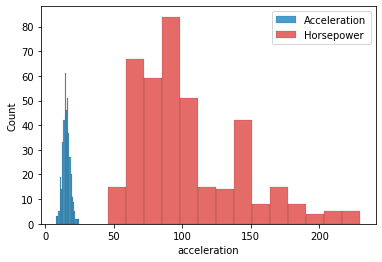

In [13]:
sns.histplot(data['acceleration'], color='#0B7CBB', linewidth=.1, label='Acceleration')
sns.histplot(data['horsepower'],   color='#DB3A34', linewidth=.1, label='Horsepower')
plt.legend()
plt.show()

Step #1: Subtract the mean

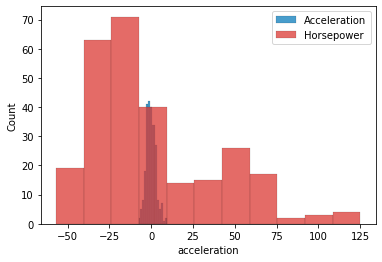

In [14]:
X_train['acceleration'] = X_train['acceleration'] - X_train['acceleration'].mean()
X_train['horsepower']   = X_train['horsepower']   - X_train['horsepower'].mean()

sns.histplot(X_train['acceleration'], color='#0B7CBB', linewidth=.1, label='Acceleration')
sns.histplot(X_train['horsepower'],   color='#DB3A34', linewidth=.1, label='Horsepower')
plt.legend()
plt.show()

Step #2: Divide by the standard deviation

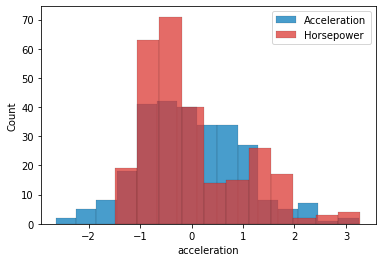

In [15]:
X_train['acceleration'] = X_train['acceleration']/X_train['acceleration'].std()
X_train['horsepower']   = X_train['horsepower']/X_train['horsepower'].std()

sns.histplot(X_train['acceleration'], color='#0B7CBB', linewidth=.1, label='Acceleration')
sns.histplot(X_train['horsepower'],   color='#DB3A34', linewidth=.1, label='Horsepower')
plt.legend()
plt.show()

In [ ]:
X_train.describe().round()

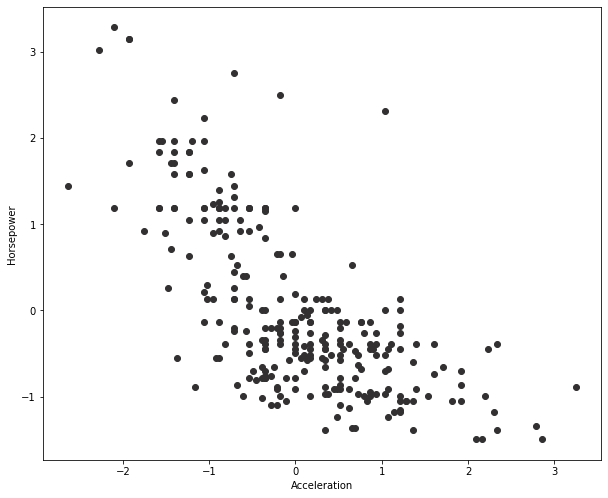

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train['acceleration'],X_train['horsepower'], c = '#323031')
plt.xlabel('Acceleration')
plt.ylabel('Horsepower')
plt.gca().set_aspect('equal', adjustable='box')

In [18]:
# Normalizing testing dataset
X_test['acceleration'] = X_test['acceleration'] - X_test['acceleration'].mean()
X_test['horsepower']   = X_test['horsepower']   - X_test['horsepower'].mean()

X_test['acceleration'] = X_test['acceleration']/X_test['acceleration'].std()
X_test['horsepower']   = X_test['horsepower']/X_test['horsepower'].std()

# Training

In [19]:
model2 = tf.keras.Sequential()
model2.add(InputLayer(input_shape=2))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))

In [20]:
model2.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=0.001))

In [21]:
model2.fit(X_train, y_train,validation_split=0.2,verbose=1, epochs=50)

Epoch 1/50
7/7 [==============================] - 0s 22ms/step - loss: 23.1047 - val_loss: 25.2399
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 22.7795 - val_loss: 24.9378
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 22.4636 - val_loss: 24.6132
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 22.1125 - val_loss: 24.2302
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 21.6734 - val_loss: 23.7478
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 21.1136 - val_loss: 23.1379
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 20.3800 - val_loss: 22.3478
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 19.4431 - val_loss: 21.3342
Epoch 9/50
7/7 [==============================] - 0s 5ms/step - loss: 18.2277 - val_loss: 20.0962
Epoch 10/50
7/7 [==============================] - 0s 5ms/step - loss: 16.8561 - val_loss: 18.7269
Epoch 11/50
7/7 [=

In [22]:
# Accuracy (Root Mean Squared Error)
y_pred = model2.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

4.23883178521205